In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
df=pd.read_csv("Algerian_forest_fires_dataset_cleaning.csv")

In [47]:
df.head( )

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [48]:
df.drop(["day","month","year"],axis=1,inplace=True)

In [49]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [50]:
df["Classes"].value_counts()

Classes
fire             131
not fire          98
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [51]:
df["Classes"]=np.where(df["Classes"].str.contains("not fire"),0,1)

In [52]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
235,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
236,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
237,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
238,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
239,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [53]:
df["Classes"].value_counts()

Classes
1    137
0    103
Name: count, dtype: int64

In [54]:
# independent and dependent features
x=df.drop("FWI",axis=1)
y=df["FWI"]

In [55]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [57]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((180, 11), (180,), (60, 11), (60,))

In [58]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.665096,-0.360453,-0.323382,0.686284,0.493958,0.389320,0.606687,0.469450,0.515305,0.255838
RH,-0.665096,1.000000,0.267826,0.211859,-0.619356,-0.365434,-0.185669,-0.679593,-0.310633,-0.398770,-0.390461
Ws,-0.360453,0.267826,1.000000,0.303319,-0.229800,-0.021053,0.056838,-0.057932,0.008139,-0.108548,-0.194943
Rain,-0.323382,0.211859,0.303319,1.000000,-0.539117,-0.272096,-0.286354,-0.332135,-0.282768,-0.369215,-0.063139
FFMC,0.686284,-0.619356,-0.229800,-0.539117,1.000000,0.604497,0.508735,0.741871,0.589524,0.760663,0.233498
DMC,0.493958,-0.365434,-0.021053,-0.272096,0.604497,1.000000,0.876616,0.678726,0.983756,0.604478,0.178568
DC,0.389320,-0.185669,0.056838,-0.286354,0.508735,0.876616,1.000000,0.508458,0.946668,0.524998,-0.117323
ISI,0.606687,-0.679593,-0.057932,-0.332135,0.741871,0.678726,0.508458,1.000000,0.635813,0.739261,0.269961
BUI,0.469450,-0.310633,0.008139,-0.282768,0.589524,0.983756,0.946668,0.635813,1.000000,0.595964,0.072510
Classes,0.515305,-0.398770,-0.108548,-0.369215,0.760663,0.604478,0.524998,0.739261,0.595964,1.000000,0.150208


<Axes: >

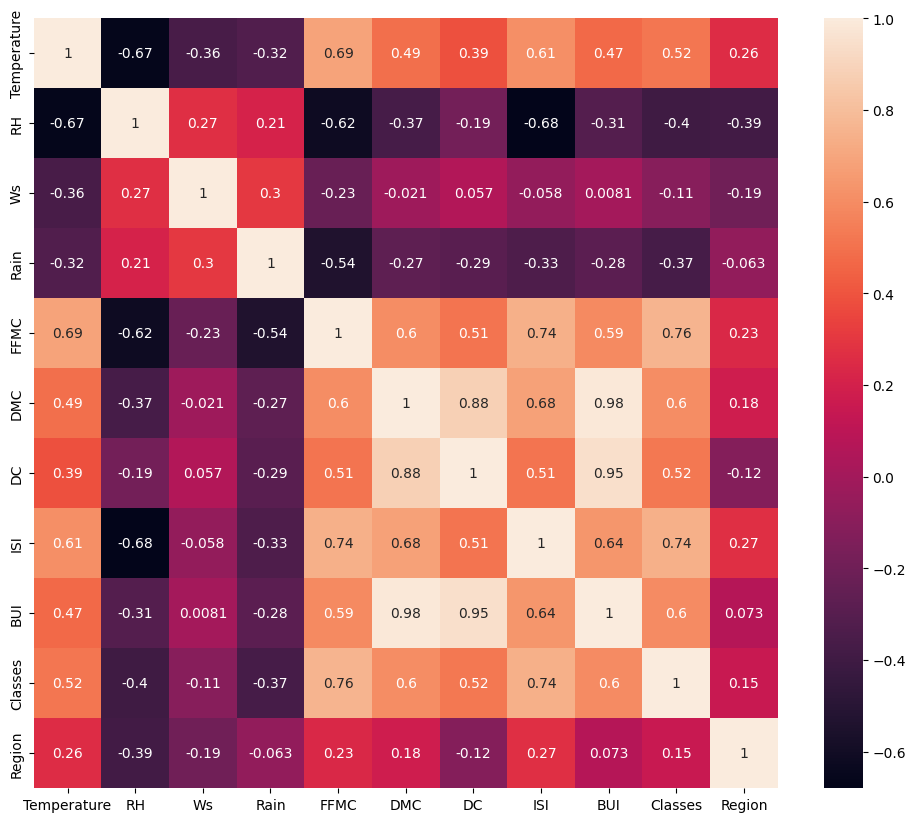

In [59]:
plt.figure(figsize=(12,10))
sns.heatmap(x_train.corr(),annot=True)

In [60]:
# we can remove those features because these are highly correlated 
# if we remove those it not much effect the dataset

def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i,j])>threshold):
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr    


In [61]:
corr_features=correlation(x_train,0.85)

In [62]:
corr_features

{'BUI', 'DC'}

In [63]:
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)
x_test.shape,x_train.shape

((60, 9), (180, 9))

feature scaling or standardiztion

In [64]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [65]:
x_train_scaled

array([[-0.85059547,  0.70039714,  0.56850263, ..., -0.79872371,
        -1.09321633, -0.9459053 ],
       [-1.11826538, -0.78121219,  0.56850263, ..., -0.77451181,
        -1.09321633,  1.05718828],
       [-1.65360518,  1.17181829,  0.17187289, ..., -1.06505462,
        -1.09321633, -0.9459053 ],
       ...,
       [-1.92127509,  0.90243477,  0.56850263, ..., -1.08926652,
        -1.09321633, -0.9459053 ],
       [ 1.55843366, -0.71386631, -0.6213866 , ..., -0.6534523 ,
        -1.09321633,  1.05718828],
       [-0.58292557,  0.96978065,  2.15502162, ..., -0.87135941,
        -1.09321633, -0.9459053 ]], shape=(180, 9))

boxplot to understand effect of standard scaler

Text(0.5, 1.0, 'x_train after scaling')

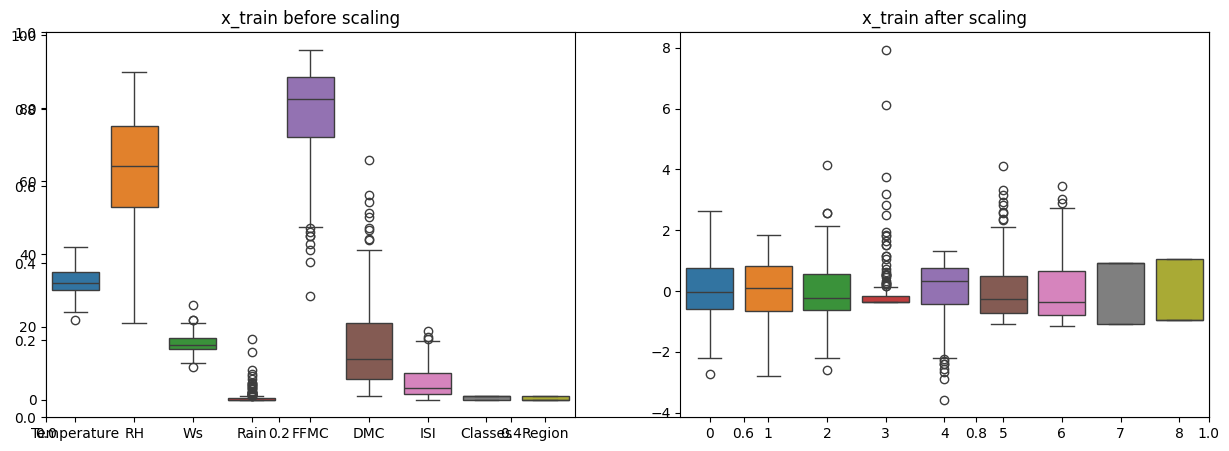

In [66]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title("x_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title("x_train after scaling")


mae: 0.7576778478881505
r2: 0.9773419493728723


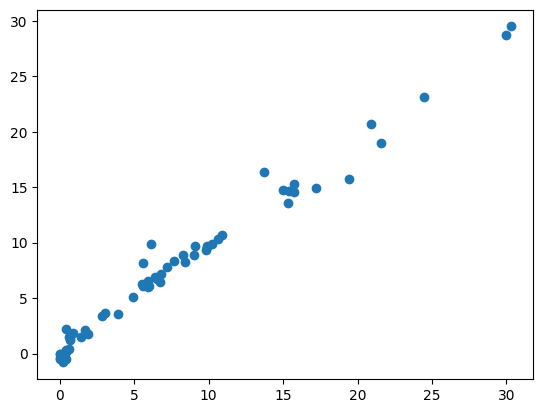

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
linreg=LinearRegression()
linreg.fit(x_train_scaled,y_train)
y_pred=linreg.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mae:",mae)
print("r2:",r2)
plt.scatter(y_test,y_pred)

LASSO REGRESSION

mae: 1.3370307602429736
r2: 0.9410175373336318


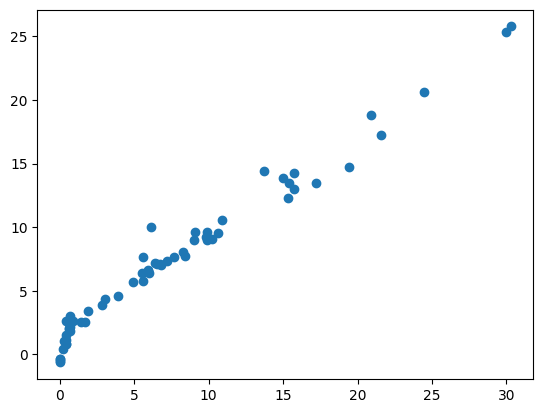

In [68]:
#LASSO REGRESSION IS A REGULARIZATION TECHNIQUE USED TO PREVENT OVERFITTING IN LINEAR REGRESSION BY ADDING A PENALTY TERM TO THE LOSS FUNCTION. 
# IT HELPS IN FEATURE SELECTION BY SHRINKING COEFFICIENTS OF LESS IMPORTANT FEATURES TO ZERO,
#  THUS REMOVING THEM FROM THE MODEL. THIS LEADS TO A SIMPLER AND MORE INTERPRETABLE MODEL, IMPROVING GENERALIZATION PERFORMANCE ON NEW DATA.
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score
Lasso=Lasso()
Lasso.fit(x_train_scaled,y_train)
y_pred=Lasso.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mae:",mae)
print("r2:",r2)
plt.scatter(y_test,y_pred)


cross validation Lasso

In [69]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)

LassoCV(cv=5)

mae: 0.7632050073457847
r2: 0.977743440467773


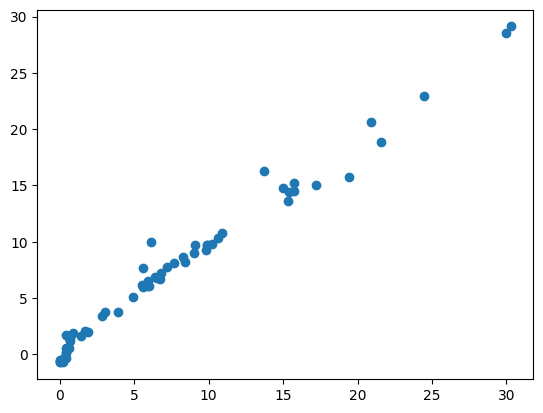

In [70]:
y_pred=lassocv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mae:",mae)
print("r2:",r2)

# 005.model training with cross validation using ridge regression 

mae: 0.7817131646067195
r2: 0.976594414803507


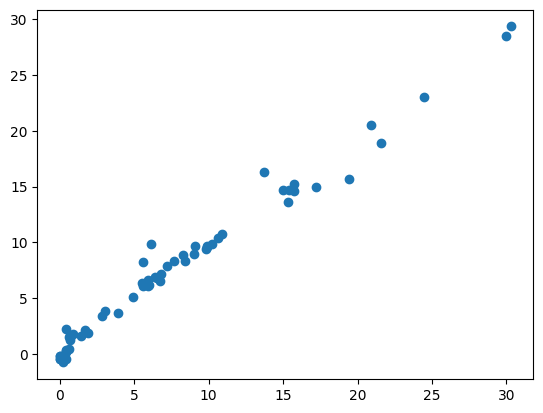

In [71]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred=ridge.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mae:",mae)
print("r2:",r2)
plt.scatter(y_test,y_pred)

mae: 0.7817131646067195
r2: 0.976594414803507


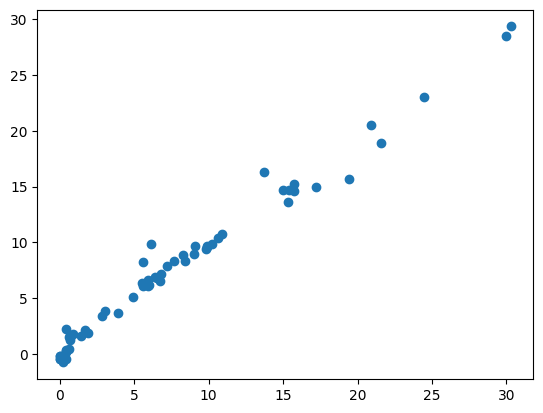

In [72]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error,r2_score
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train_scaled,y_train)
y_pred=ridge.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mae:",mae)
print("r2:",r2)
plt.scatter(y_test,y_pred)

In [73]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

ELASTIC NET REGRESSION

mae: 2.0622929113677757
r2: 0.8650337485905482


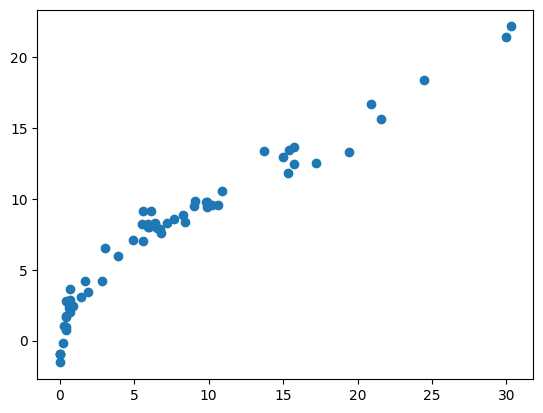

In [74]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score
elastic=ElasticNet()
elastic.fit(x_train_scaled,y_train)
y_pred=elastic.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mae:",mae)
print("r2:",r2)
plt.scatter(y_test,y_pred)

006.model picling in ML PROJECT


In [75]:
# PICKLE THE ML MODELS,PREPROCESSING MODEL STANDARDSCALER
scaler

StandardScaler()

In [76]:
ridge

Ridge()

In [77]:
import pickle
pickle.dump(scaler,open("scaler.pkl","wb"))
pickle.dump(scaler,open("ridge.pkl","wb"))